In [ ]:
! pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.91.0
    Uninstalling openai-1.91.0:
      Successfully uninstalled openai-1.91.0


In [ ]:
import openai
import requests
import json
import os

# ChatGPT API-Key
To Generate the API key, follow these steps:
1. Go to https://platform.openai.com/
2. Create an account if you don't have one else login to the website.
3. Go to settings>Api keys or click here: https://platform.openai.com/settings/organization/api-keys
4. Click “Create new secret key”, copy and save it to a file

ISSUE:
It is not free but they have free trial credits to new accounts. You can check your balance here: https://platform.openai.com/account/usage


In [ ]:
# if you get the api key from web
openai.api_key  = ""

#If its saved in a .txt file
with open('/content/GPT_API_KEY.txt') as f: openai.api_key  = f.read()

# Using GPT for Text Generation (short story generation)
List of models: https://platform.openai.com/docs/models

In [ ]:
def generate_text(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a funny story teller assistant."},
            {"role": "user", "content": prompt}
        ]
    )
    return response['choices'][0]['message']['content']


prompt = "I'm bored, can you tell me a short story?"
generate_text(prompt)


"Absolutely! This one is a story about a cat named Napoleon.\n\nOnce upon a time, there was a cat named Napoleon. Napoleon wasn’t your ordinary cat. He had a unique ability to walk on two legs, just like humans. Not only that, but he also had a very peculiar habit: he loved to sing! Yes, you heard it right, he could sing!\n\nNapoleon's favorite past-time was to put on concerts for the neighborhood. Every day, at the stroke of seven, he would climb onto the porch, strike a few dramatic poses, and then burst into song. His repertoire was wide, spanning everything from opera to 80's pop to the meow mix commercial song.\n\nHis hilarious antics, while incredibly entertaining for the neighbors, were not so fun for his owner, Mrs. Abernathy. She was a nice, simple woman who loved quiet evenings and her television soap operas, and Napoleon's singing sessions often drowned out the dramatic twists and turns of her favorite shows.\n\nOne day, Mrs. Abernathy decided that she had had enough. If Nap

# Usign GPT for Text Classification (Sentiment Classification)

In [ ]:

def classify_text(text):
    prompt = f"""
    You are a text classifier. Classify the following text as Positive, Negative, or Neutral.

    Text: "{text}"

    Label:"""

    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "user", "content": prompt}
        ],
        temperature=0  # deterministic output
    )

    return response['choices'][0]['message']['content'].strip()


In [ ]:
sample_text = "I'm so excited about the concert tonight!"
label = classify_text(sample_text)
print(f"Text: {sample_text}\nClassification: {label}")


Text: I'm so excited about the concert tonight!
Classification: Positive




---



# Using GPT for analyzing image classification


In [ ]:
import base64
from IPython.display import Image



In [ ]:
# Load and encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def cal_vision_api(prompt, image_path):
    base64_image = encode_image(image_path)
    response = openai.ChatCompletion.create(
            model="gpt-4o",
            messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": prompt},
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}"
                                }
                            }
                        ]
                    }
                ],
                max_tokens=100
            )

    return response['choices'][0]['message']['content']

In [ ]:
prompt = "Describe the image"
image_path = "/content/image1.jpg"

cal_vision_api(prompt, image_path)


'The image shows a white dog with its eyes closed and mouth open in a joyful expression, resembling a smile. The background is bright yellow, enhancing the cheerful mood of the image.'

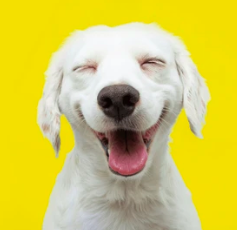

In [ ]:
Image(filename=image_path)

# Using GPT for Image classification

In [ ]:
prompt = "What object or animal is in this image? Classify it. Labels are: {'dog','cat'}"
image_path = "/content/image1.jpg"

cal_vision_api(prompt, image_path)


"The object in the image is a 'dog'."

# Image Generation
PROMPT = "A futuristic flying car over a neon city at night"

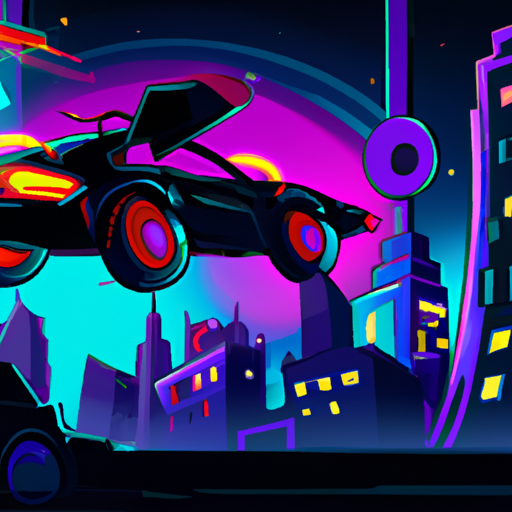

In [ ]:
def generate_image(prompt):
    response = openai.Image.create(
        prompt=prompt,
        n=1,
        size="512x512"
    )
    return response['data'][0]['url']  # URL of generated image


In [ ]:
print(generate_image("A futuristic flying car over a neon city at night"))

https://oaidalleapiprodscus.blob.core.windows.net/private/org-G1qARIEkoqAFImLEbk8i0M5b/user-JySuFbLNkDLv5VzqQMDRDknL/img-Yjz6pZrA3RH2MkjvUkGtcDLL.png?st=2025-06-26T18%3A30%3A15Z&se=2025-06-26T20%3A30%3A15Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=cc612491-d948-4d2e-9821-2683df3719f5&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-06-26T11%3A00%3A01Z&ske=2025-06-27T11%3A00%3A01Z&sks=b&skv=2024-08-04&sig=/HQe0Uw5rriVxrjuOb4o0IIBnw08PXvG8VyIOWyz930%3D


# What can be done next?
- Build a chatbot using GPT
- experimenting the same task with other LLM models such as:
  - Deepseek(https://platform.deepseek.com/sign_in),
  - Mistral(https://auth.mistral.ai/ui/login?flow=e164f918-b552-41e2-a587-196196fdb8fc),
  - gemini
